# XAI - Water Quality in Brisbane


Research question: How can machine learning models predict Dissolved Oxygen levels in water, and what factors most influence these predictions?

## Read and clean dataset

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [18]:
df = pd.read_csv('../data/brisbane_water_quality.csv')

In [19]:
df.describe()

,Record number,Average Water Speed,Average Water Direction,Chlorophyll,Chlorophyll [quality],Temperature,Temperature [quality],Dissolved Oxygen,Dissolved Oxygen [quality],Dissolved Oxygen (%Saturation),Dissolved Oxygen (%Saturation) [quality],pH,pH [quality],Salinity,Salinity [quality],Specific Conductance,Specific Conductance [quality],Turbidity,Turbidity [quality]
count,30894.000000,30874.000000,30893.000000,30309.000000,30086.000000,25730.000000,25550.000000,26594.000000,26370.000000,25145.000000,24944.000000,29810.000000,29586.0,26936.000000,26712.0,29527.000000,29303.0,28894.000000,28670.0
mean,16914.500000,16.799189,177.544711,2.782251,1020.006648,24.415394,1021.673973,6.815158,1020.488055,96.641207,1022.976668,8.063260,1020.0,31.003265,1020.0,47.927487,1020.0,3.941688,1020.0
std,8918.473945,13.168964,103.621786,1.859404,1.153049,3.494728,40.599400,0.620860,21.976218,8.108339,54.204781,0.091714,0.0,3.469102,0.0,5.155305,0.0,4.072715,0.0
min,1468.000000,0.000000,0.000000,0.100000,1020.000000,17.000000,1020.000000,3.030000,1020.000000,51.836000,1020.000000,7.309000,1020.0,0.057000,1020.0,0.021000,1020.0,0.335000,1020.0
25%,9191.250000,6.594250,86.314000,1.451000,1020.000000,21.292000,1020.000000,6.387000,1020.000000,92.226000,1020.000000,7.980000,1020.0,29.151000,1020.0,45.046000,1020.0,2.354250,1020.0
50%,16914.500000,13.390500,176.326000,2.371000,1020.000000,25.245500,1020.000000,6.814000,1020.000000,96.513000,1020.000000,8.073000,1020.0,30.603500,1020.0,47.420000,1020.0,3.093000,1020.0
75%,24637.750000,23.600000,267.870000,3.650000,1020.000000,27.254000,1020.000000,7.254000,1020.000000,101.668000,1020.000000,8.140000,1020.0,33.918000,1020.0,53.361000,1020.0,4.005000,1020.0
max,32361.000000,89.912000,359.994000,43.301000,1220.000000,32.063000,2010.000000,9.260000,2010.000000,134.082000,2010.000000,8.255000,1020.0,36.000000,1020.0,54.996000,1020.0,49.869000,1020.0


In [20]:
# [quality] columns contain metadata about the quality of the measurement. We however do not have access to what the specific codes actually mean.
# Therefore they have no use to us in this analysis, and we therefore drop them.

df = df.drop(columns=[col for col in df.columns if '[quality]' in col])


In [21]:
# Ensure that Timestamp column is of datetime type
df['Timestamp'] = pd.to_datetime(df['Timestamp'])


In [22]:
# Set Timestamp as index
df = df.set_index('Timestamp')

In [23]:
# All columns should now have the correct datatype (datetime timstamp, int record number, all other are floats)

df.dtypes

Record number                       int64
Average Water Speed               float64
Average Water Direction           float64
Chlorophyll                       float64
Temperature                       float64
Dissolved Oxygen                  float64
Dissolved Oxygen (%Saturation)    float64
pH                                float64
Salinity                          float64
Specific Conductance              float64
Turbidity                         float64
dtype: object

In [24]:
# For some measurements, the values are missing (nan).
print(f"Total number of rows: {df.shape[0]}")
print(f"Number of rows without any NaN values: {df.dropna().shape[0]}")

Total number of rows: 30894
Number of rows without any NaN values: 19373


In [25]:
# We can fill these missing values using interpolation.
# This is a common technique used in time series analysis to fill missing values in time series data. 

df = df.interpolate(method='time')

In [26]:
# Now all rows have values for all columns
print(f"Total number of rows: {df.shape[0]}")
print(f"Number of rows without any NaN values: {df.dropna().shape[0]}")

Total number of rows: 30894
Number of rows without any NaN values: 30894


## Exploratory Data Analysis

## Plot oxygen levels, by time

In [27]:
# Create columns for each unique month, and day.

plot_df = df.copy()

plot_df['Year-Month'] = plot_df.index.to_period('M').astype(str)
plot_df['Year-Month-Day'] = plot_df.index.to_period('D').astype(str)

In [28]:
df

,Record number,Average Water Speed,Average Water Direction,Chlorophyll,Temperature,Dissolved Oxygen,Dissolved Oxygen (%Saturation),pH,Salinity,Specific Conductance,Turbidity
Timestamp,,,,,,,,,,,
2023-08-04 23:00:00,1468,4.834,73.484,1.621,20.018,7.472,101.175,8.176,35.215,53.262,2.068
2023-08-04 23:30:00,1469,2.544,106.424,1.959,19.986,7.455,100.884,8.175,35.209,53.254,1.994
2023-08-04 23:00:00,1470,1.260,156.755,1.620,20.001,7.430,100.571,8.171,35.207,53.252,2.030
2023-08-04 23:30:00,1471,0.760,281.754,1.761,19.983,7.419,100.398,8.171,35.211,53.257,1.973
2023-08-04 23:00:00,1472,3.397,244.637,1.635,19.986,7.429,100.538,8.171,35.208,53.253,1.944
...,...,...,...,...,...,...,...,...,...,...,...
2024-06-27 08:20:00,32357,13.314,82.720,0.944,18.607,6.876,87.556,8.151,29.268,45.134,3.963
2024-06-27 08:30:00,32358,32.617,18.081,1.161,18.551,6.918,87.987,8.163,29.254,45.115,3.928
2024-06-27 08:40:00,32359,8.552,306.184,1.192,18.558,6.651,84.606,8.145,29.250,45.110,4.097


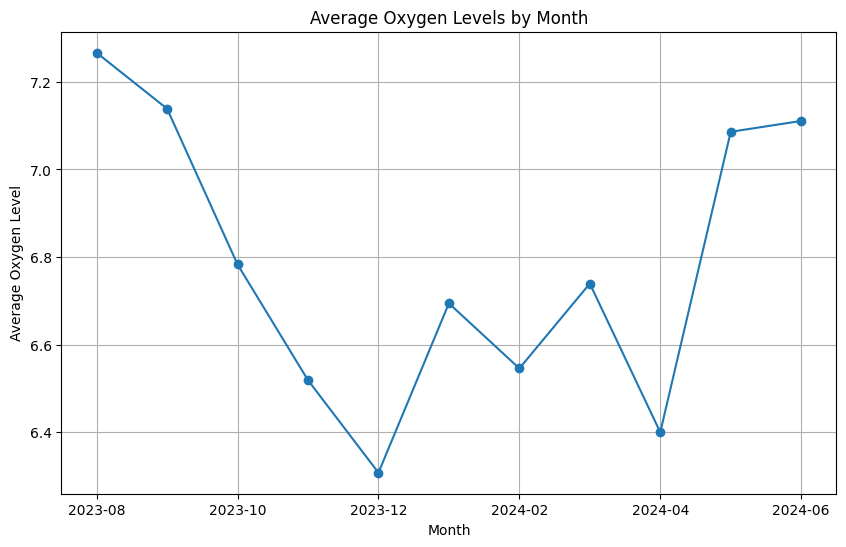

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by month and calculate the mean Dissolved Oxygen for each month
monthly_oxygen_levels = plot_df.groupby('Year-Month')['Dissolved Oxygen'].mean()

# Plot the results
plt.figure(figsize=(10, 6))
monthly_oxygen_levels.plot(kind='line', marker='o')
plt.title('Average Oxygen Levels by Month')
plt.xlabel('Month')
plt.ylabel('Average Oxygen Level')
plt.grid(True)
plt.show()

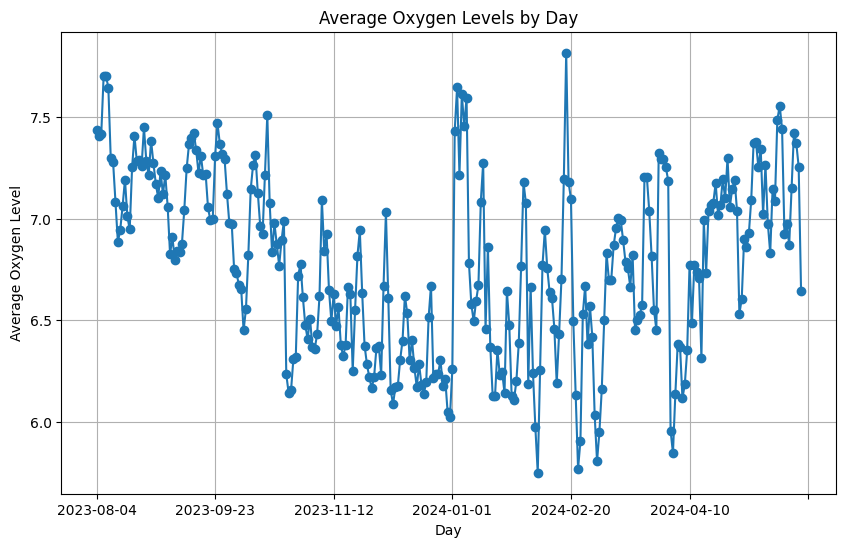

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by day and calculate the mean Dissolved Oxygen for each day
daily_oxygen_levels = plot_df.groupby('Year-Month-Day')['Dissolved Oxygen'].mean()

# Plot the results
plt.figure(figsize=(10, 6))
daily_oxygen_levels.plot(kind='line', marker='o')
plt.title('Average Oxygen Levels by Day')
plt.xlabel('Day')
plt.ylabel('Average Oxygen Level')
plt.grid(True)
plt.show()

## Model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X = df.drop(columns=['Dissolved Oxygen'])  # Features
y = df['Dissolved Oxygen']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

## XAI Methods

### Shap (Shapley Additive Explanations)


100%|===================| 6168/6179 [04:28<00:00]        

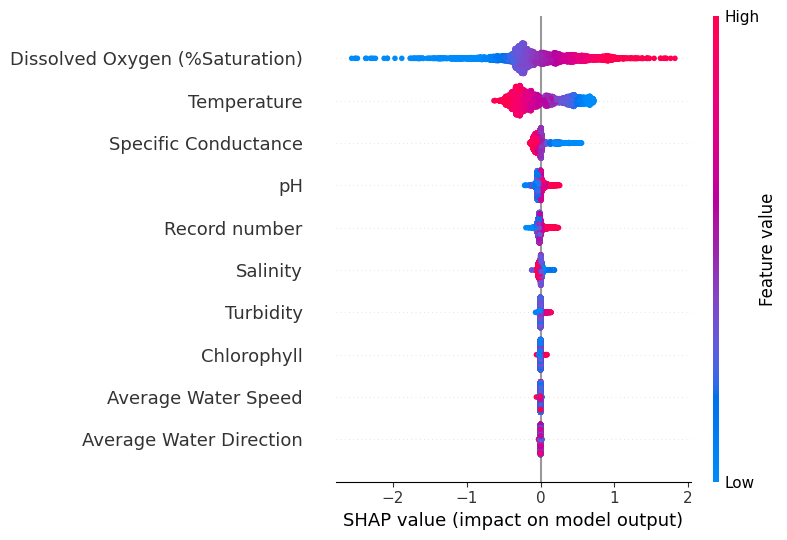

TypeError: loop of ufunc does not support argument 0 of type Explanation which has no callable conjugate method

In [ ]:
import shap

explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)


### LIME 